In [0]:
# Mount your google drive as the data drive
# This will require google authorization
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas
import numpy as np
import math
import random
import os
import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
data = pandas.read_csv('/content/drive/My Drive/data/lyrics.csv')

In [0]:
print(len(data))

362237


In [0]:
data_genre_lyrics = data.iloc[:,4:]
print(data_genre_lyrics.iloc[0:10,:])

  genre                                             lyrics
0   Pop  Oh baby, how you doing?\nYou know I'm gonna cu...
1   Pop  playin' everything so easy,\nit's like you see...
2   Pop  If you search\nFor tenderness\nIt isn't hard t...
3   Pop  Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...
4   Pop  Party the people, the people the party it's po...
5   Pop  I heard\nChurch bells ringing\nI heard\nA choi...
6   Pop  This is just another day that I would spend\nW...
7   Pop  Waiting, waiting, waiting, waiting\nWaiting, w...
8   Pop  [Verse 1:]\nI read all of the magazines\nwhile...
9   Pop  N-n-now, honey\nYou better sit down and look a...


In [0]:
data_genre_lyrics.genre.unique()

array(['Pop', 'Hip-Hop', 'Not Available', 'Other', 'Rock', 'Metal',
       'Country', 'Jazz', 'Electronic', 'Folk', 'R&B', 'Indie'],
      dtype=object)

In [0]:
subset_data = [data_genre_lyrics.iloc[i,:] for i in range(len(data_genre_lyrics)) if data_genre_lyrics.iloc[i,0] !='Not Available' and data_genre_lyrics.iloc[i,0] != 'Other']
print(len(subset_data))

308740


In [0]:
original_song_counts = np.zeros(10)

for i in range(len(data_genre_lyrics)):
  if data_genre_lyrics.iloc[i,0] == 'Pop':
    original_song_counts[0] = original_song_counts[0] + 1
  elif data_genre_lyrics.iloc[i,0] == 'Hip-Hop':
    original_song_counts[1] = original_song_counts[1] + 1
  elif data_genre_lyrics.iloc[i,0] == 'Rock':
    original_song_counts[2] = original_song_counts[2] + 1
  elif data_genre_lyrics.iloc[i,0] == 'Metal':
    original_song_counts[3] = original_song_counts[3] + 1
  elif data_genre_lyrics.iloc[i,0] == 'Country':
    original_song_counts[4] = original_song_counts[4] + 1
  elif data_genre_lyrics.iloc[i,0] == 'Jazz':
    original_song_counts[5] = original_song_counts[5] + 1
  elif data_genre_lyrics.iloc[i,0] == 'Electronic':
    original_song_counts[6] = original_song_counts[6] + 1
  elif data_genre_lyrics.iloc[i,0] == 'Folk':
    original_song_counts[7] = original_song_counts[7] + 1
  elif data_genre_lyrics.iloc[i,0] == 'R&B':
    original_song_counts[8] = original_song_counts[8] + 1
  elif data_genre_lyrics.iloc[i,0] == 'Indie':
    original_song_counts[9] = original_song_counts[9] + 1
  

print(original_song_counts)

[ 49444.  33965. 131377.  28408.  17286.  17147.  16205.   3241.   5935.
   5732.]


In [0]:
subset_data = pandas.DataFrame(subset_data)

In [0]:
!pip3 install langdetect

In [0]:
from langdetect import detect

([<matplotlib.patches.Wedge at 0x7f1efb929860>,
 [Text(0.963691,0.530376,'Pop'),
  Text(0.238922,1.07374,'Hip-Hop'),
  Text(-1.09367,0.117805,'Rock'),
  Text(-0.0573945,-1.0985,'Metal'),
  Text(0.441253,-1.00762,'Country'),
  Text(0.760309,-0.794941,'Jazz'),
  Text(0.981577,-0.496495,'Electronic'),
  Text(1.06003,-0.293844,'Folk'),
  Text(1.08281,-0.193733,'R&B'),
  Text(1.09813,-0.0641225,'Indie')])

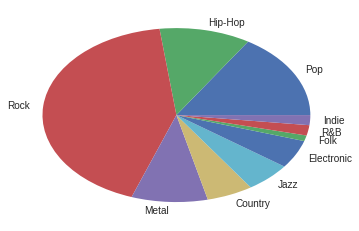

In [0]:
plt.pie(original_song_counts, labels = subset_data.genre.unique())

In [0]:
num_words = [len(str(subset_data.iloc[i,1])) for i in range(len(subset_data))]
print(num_words[0:10])

[1961, 1270, 827, 2344, 1540, 632, 1408, 2112, 2110, 1595]


genre     Rock
lyrics       '
Name: 6978, dtype: object


(array([1.67055e+05, 1.02947e+05, 2.32260e+04, 9.44100e+03, 4.06700e+03,
        1.36500e+03, 4.17000e+02, 1.00000e+02, 4.90000e+01, 1.60000e+01,
        1.50000e+01, 1.20000e+01, 5.00000e+00, 3.00000e+00, 2.00000e+00,
        8.00000e+00, 1.00000e+00, 1.00000e+00, 5.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.000000e+00, 8.436200e+02, 1.686240e+03, 2.528860e+03,
        3.371480e+03, 4.214100e+03, 5.056720e+03, 5.899340e+03,
        6.741960e+03, 7.584580e+03, 8.427200e+03, 9.269820e+03,
        1.011244e+04, 1.095506e+04, 1.179768e+04, 1.264030e+04,
        1.34

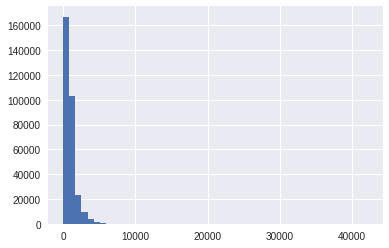

In [0]:
k = num_words.index(min(num_words))
print(subset_data.iloc[k,:])
plt.hist(num_words,50)

889.0414458767896
42132
1
862.2422951494902


(array([  1.,   0.,   1.,   1.,   7.,  11.,  11.,  13.,  22.,  42.,  54.,
         62.,  85., 140., 193., 221., 293., 332., 433., 478., 547., 571.,
        618., 619., 668., 600., 589., 564., 504., 441., 408., 372., 278.,
        226., 169., 124.,  97.,  71.,  45.,  22.,  28.,  18.,  11.,   5.,
          1.,   1.,   1.,   0.,   1.,   1.]),
 array([-2521.6140658 , -2381.8702349 , -2242.12640399, -2102.38257308,
        -1962.63874217, -1822.89491126, -1683.15108035, -1543.40724944,
        -1403.66341853, -1263.91958763, -1124.17575672,  -984.43192581,
         -844.6880949 ,  -704.94426399,  -565.20043308,  -425.45660217,
         -285.71277127,  -145.96894036,    -6.22510945,   133.51872146,
          273.26255237,   413.00638328,   552.75021419,   692.4940451 ,
          832.237876  ,   971.98170691,  1111.72553782,  1251.46936873,
         1391.21319964,  1530.95703055,  1670.70086146,  1810.44469236,
         1950.18852327,  2089.93235418,  2229.67618509,  2369.420016  ,
         2

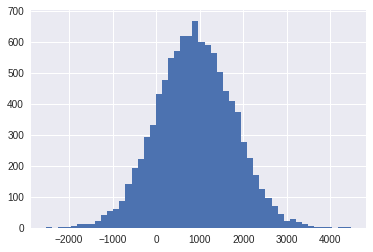

In [0]:
from scipy.stats import norm
print(np.mean(num_words))
print(np.max(num_words))
print(np.min(num_words))
print(np.std(num_words))

mean = np.mean(num_words)
std = np.std(num_words)
values = np.random.normal(mean,std,10000)
plt.hist(values,50)

In [0]:
new_data_genre_lyrics = [subset_data.iloc[i,:] for i in range(len(subset_data)) if len(str(subset_data.iloc[i,1])) >= 200 and len(str(subset_data.iloc[i,1])) <=3000 and subset_data.iloc[i,1]]


In [0]:
print(len(new_data_genre_lyrics))

219911


In [0]:
cropped_data = pandas.DataFrame(new_data_genre_lyrics)

In [0]:
new_data_genre_lyrics = np.array(cropped_data.iloc[0,:])
for i in range(1,len(cropped_data)):
  if (i%1000 == 0):
    print(i)
  try:
    if detect(str(cropped_data.iloc[i,1][0:50]))=='en':
      new_data_genre_lyrics = np.vstack((new_data_genre_lyrics,np.array([cropped_data.iloc[i,:]]))) 
  except:
    print("not language")

1000
2000
3000
4000
5000
6000
7000
8000
9000
not language
10000
11000
12000
13000
not language
14000
not language
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
not language
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
not language
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
not language
not language
not language
not language
not language
not language
not language
not language
not language
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
13

In [0]:
print(len(new_data_genre_lyrics))

194922


In [0]:
cropped_data = pandas.DataFrame(new_data_genre_lyrics)

In [0]:
cropped_data.columns = ['Genre','Lyrics']

In [0]:
cropped_data.head()

,Genre,Lyrics
0,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,Pop,"playin' everything so easy,\nit's like you see..."
2,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,Pop,"Party the people, the people the party it's po..."


In [0]:
cropped_data.to_csv("english_data.csv")

In [0]:
print(cropped_data.iloc[0:10,:])

  Genre                                             Lyrics
0   Pop  Oh baby, how you doing?\nYou know I'm gonna cu...
1   Pop  playin' everything so easy,\nit's like you see...
2   Pop  If you search\nFor tenderness\nIt isn't hard t...
3   Pop  Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...
4   Pop  Party the people, the people the party it's po...
5   Pop  I heard\nChurch bells ringing\nI heard\nA choi...
6   Pop  This is just another day that I would spend\nW...
7   Pop  [Verse 1:]\nI read all of the magazines\nwhile...
8   Pop  N-n-now, honey\nYou better sit down and look a...
9   Pop  I lay alone awake at night\nSorrow fills my ey...


In [0]:
num_words_cropped = [len(str(cropped_data.iloc[i,1])) for i in range(len(cropped_data))]
print(num_words_cropped[0:10])

[1961, 1270, 827, 2344, 1540, 632, 1408, 2110, 1595, 1210]


(array([ 713.,  824.,  964., 1221., 1515., 1827., 2077., 2571., 2866.,
        3219., 3535., 4030., 4289., 4521., 4508., 4887., 4893., 4996.,
        5004., 4999., 5002., 4982., 4916., 4765., 4716., 4624., 4473.,
        4400., 4396., 4103., 3992., 4017., 3785., 3609., 3525., 3328.,
        3209., 3162., 2935., 2879., 2625., 2535., 2453., 2308., 2101.,
        2010., 1990., 1824., 1784., 1606., 1565., 1395., 1364., 1227.,
        1202., 1098., 1047.,  989.,  968.,  906.,  765.,  813.,  803.,
         759.,  639.,  724.,  622.,  611.,  583.,  515.,  503.,  497.,
         499.,  429.,  460.,  450.,  414.,  419.,  439.,  403.,  359.,
         346.,  385.,  392.,  364.,  316.,  348.,  284.,  348.,  319.,
         289.,  279.,  299.,  285.,  325.,  283.,  295.,  273.,  220.,
         292.]),
 array([ 200.,  228.,  256.,  284.,  312.,  340.,  368.,  396.,  424.,
         452.,  480.,  508.,  536.,  564.,  592.,  620.,  648.,  676.,
         704.,  732.,  760.,  788.,  816.,  844.,  872.,  90

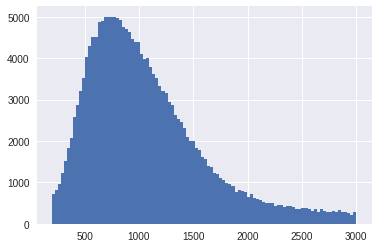

In [0]:
plt.hist(num_words_cropped,100)

1073.7508285365427
3000
200
546.7070582781865


(array([  1.,   1.,   3.,   7.,   6.,  10.,  11.,  23.,  23.,  47.,  49.,
         90., 118., 137., 186., 247., 303., 312., 401., 477., 513., 515.,
        565., 608., 598., 613., 562., 541., 531., 457., 399., 353., 300.,
        254., 198., 156., 106.,  79.,  62.,  41.,  34.,  27.,  17.,   8.,
          3.,   3.,   4.,   0.,   0.,   1.]),
 array([-977.69518728, -893.93741997, -810.17965265, -726.42188534,
        -642.66411803, -558.90635071, -475.1485834 , -391.39081608,
        -307.63304877, -223.87528145, -140.11751414,  -56.35974683,
          27.39802049,  111.1557878 ,  194.91355512,  278.67132243,
         362.42908975,  446.18685706,  529.94462437,  613.70239169,
         697.460159  ,  781.21792632,  864.97569363,  948.73346095,
        1032.49122826, 1116.24899558, 1200.00676289, 1283.7645302 ,
        1367.52229752, 1451.28006483, 1535.03783215, 1618.79559946,
        1702.55336678, 1786.31113409, 1870.0689014 , 1953.82666872,
        2037.58443603, 2121.34220335, 2205.099

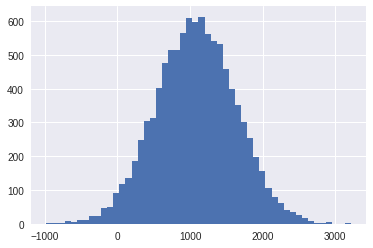

In [0]:
print(np.mean(num_words_cropped))
print(np.max(num_words_cropped))
print(np.min(num_words_cropped))
print(np.std(num_words_cropped))

mean = np.mean(num_words_cropped)
std = np.std(num_words_cropped)
values = np.random.normal(mean,std,10000)
plt.hist(values,50)

In [0]:
cropped_data.Genre.unique()

array(['Pop', 'Hip-Hop', 'Rock', 'Metal', 'Country', 'Jazz', 'Electronic',
       'Folk', 'R&B', 'Indie'], dtype=object)

In [0]:
song_counts = np.zeros(10)

for i in range(len(cropped_data)):
  if cropped_data.iloc[i,0] == 'Pop':
    song_counts[0] = song_counts[0] + 1
  elif cropped_data.iloc[i,0] == 'Hip-Hop':
    song_counts[1] = song_counts[1] + 1
  elif cropped_data.iloc[i,0] == 'Rock':
    song_counts[2] = song_counts[2] + 1
  elif cropped_data.iloc[i,0] == 'Metal':
    song_counts[3] = song_counts[3] + 1
  elif cropped_data.iloc[i,0] == 'Country':
    song_counts[4] = song_counts[4] + 1
  elif cropped_data.iloc[i,0] == 'Jazz':
    song_counts[5] = song_counts[5] + 1
  elif cropped_data.iloc[i,0] == 'Electronic':
    song_counts[6] = song_counts[6] + 1
  elif cropped_data.iloc[i,0] == 'Folk':
    song_counts[7] = song_counts[7] + 1
  elif cropped_data.iloc[i,0] == 'R&B':
    song_counts[8] = song_counts[8] + 1
  elif cropped_data.iloc[i,0] == 'Indie':
    song_counts[9] = song_counts[9] + 1

print(song_counts)

[31898. 14077. 94762. 19919. 13638.  6864.  6203.  1656.  3098.  2807.]


([<matplotlib.patches.Wedge at 0x7f1ef589ecc0>,
 [Text(0.957806,0.540932,'Pop'),
  Text(0.341534,1.04564,'Hip-Hop'),
  Text(-1.09038,0.14513,'Rock'),
  Text(0.159176,-1.08842,'Metal'),
  Text(0.696843,-0.851123,'Country'),
  Text(0.935295,-0.578985,'Jazz'),
  Text(1.03567,-0.370669,'Electronic'),
  Text(1.07419,-0.236868,'Folk'),
  Text(1.08917,-0.153947,'R&B'),
  Text(1.09887,-0.0497481,'Indie')])

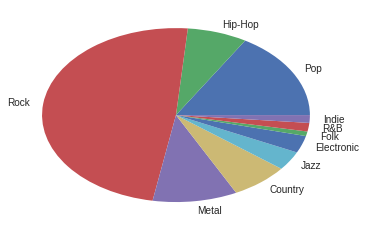

In [0]:
plt.pie(song_counts, labels = cropped_data.Genre.unique())

In [0]:
subset_data = [cropped_data.iloc[i,:] for i in range(len(cropped_data)) if cropped_data.iloc[i,0] !='Jazz' and cropped_data.iloc[i,0] != 'R&B' and cropped_data.iloc[i,0] != 'Indie' and cropped_data.iloc[i,0] != 'Folk' and cropped_data.iloc[i,0] != 'Electronic']
print(len(subset_data))

174294


In [0]:
song_counts = np.zeros(5)

for i in range(len(cropped_data)):
  if cropped_data.iloc[i,0] == 'Pop':
    song_counts[0] = song_counts[0] + 1
  elif cropped_data.iloc[i,0] == 'Hip-Hop':
    song_counts[1] = song_counts[1] + 1
  elif cropped_data.iloc[i,0] == 'Rock':
    song_counts[2] = song_counts[2] + 1
  elif cropped_data.iloc[i,0] == 'Metal':
    song_counts[3] = song_counts[3] + 1
  elif cropped_data.iloc[i,0] == 'Country':
    song_counts[4] = song_counts[4] + 1

print(song_counts)

[31898. 14077. 94762. 19919. 13638.]


In [0]:
cropped_data = pandas.DataFrame(subset_data)

([<matplotlib.patches.Wedge at 0x7f1ee65dd898>,
 [Text(0.923141,0.598173,'Pop'),
  Text(0.183022,1.08467,'Hip-Hop'),
  Text(-1.07256,-0.244163,'Rock'),
  Text(0.725424,-0.826898,'Metal'),
  Text(1.06693,-0.267687,'Country')])

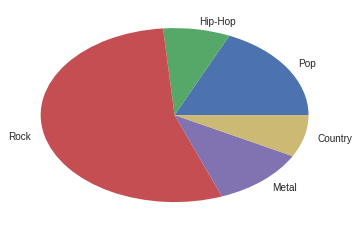

In [0]:
plt.pie(song_counts, labels = cropped_data.Genre.unique())

In [0]:
random_pop = random.sample(range(int(song_counts[0])), 10000)
random_hip_hop = random.sample(range(int(song_counts[1])), 10000)
random_rock = random.sample(range(int(song_counts[2])), 10000)
random_metal = random.sample(range(int(song_counts[3])), 10000)
random_country = random.sample(range(int(song_counts[4])), 10000)

In [0]:
pop_data = [cropped_data.iloc[i,:] for i in range(len(cropped_data)) if cropped_data.iloc[i,0] =='Pop']
hip_hop_data = [cropped_data.iloc[i,:] for i in range(len(cropped_data)) if cropped_data.iloc[i,0] =='Hip-Hop']
rock_data = [cropped_data.iloc[i,:] for i in range(len(cropped_data)) if cropped_data.iloc[i,0] =='Rock']
metal_data = [cropped_data.iloc[i,:] for i in range(len(cropped_data)) if cropped_data.iloc[i,0] =='Metal']
country_data = [cropped_data.iloc[i,:] for i in range(len(cropped_data)) if cropped_data.iloc[i,0] =='Country']

In [0]:
print(len(pop_data))
print(len(hip_hop_data))
print(len(rock_data))
print(len(metal_data))
print(len(country_data))

31898
14077
94762
19919
13638


In [0]:
pop_data = [pop_data[i] for i in random_pop]
hip_hop_data = [hip_hop_data[i] for i in random_hip_hop]
rock_data = [rock_data[i] for i in random_rock]
metal_data = [metal_data[i] for i in random_metal]
country_data = [country_data[i] for i in random_country]

In [0]:
print(len(pop_data))
print(len(hip_hop_data))
print(len(rock_data))
print(len(metal_data))
print(len(country_data))

10000
10000
10000
10000
10000


In [0]:
data = np.vstack((pop_data,hip_hop_data,rock_data,metal_data,country_data))


In [0]:
print(data.shape)

(50000, 2)


In [0]:
song_counts = np.zeros(5)

for i in range(len(data)):
  if data[i,0] == 'Pop':
    song_counts[0] = song_counts[0] + 1
  elif data[i,0] == 'Hip-Hop':
    song_counts[1] = song_counts[1] + 1
  elif data[i,0] == 'Rock':
    song_counts[2] = song_counts[2] + 1
  elif data[i,0] == 'Metal':
    song_counts[3] = song_counts[3] + 1
  elif data[i,0] == 'Country':
    song_counts[4] = song_counts[4] + 1

print(song_counts)

[10000. 10000. 10000. 10000. 10000.]


([<matplotlib.patches.Wedge at 0x7f1ede466320>,
 [Text(0.889919,0.646564,'Country'),
  Text(-0.339919,1.04616,'Hip-Hop'),
  Text(-1.1,-5.14947e-08,'Metal'),
  Text(-0.339919,-1.04616,'Pop'),
  Text(0.889919,-0.646564,'Rock')])

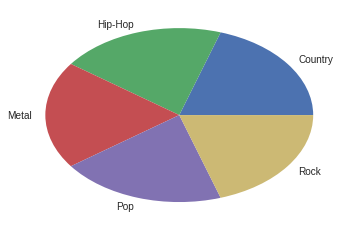

In [0]:
plt.pie(song_counts, labels = np.unique(data[:,0]))

In [0]:
data[:,1] =[data[i,1].lower().replace('-',' ').replace('?','').replace('.','').replace(',','').replace('!','').replace('[','').replace(']','').replace('\n',' ').replace(':','').replace('(','').replace(')','') for i in range(len(data))]

In [0]:
print(data[1,:])
print(np.shape(data))

['Pop'
 "don't grow sad wondering where you went wrong don't go mad just carry on there's a feeling you get when there's nowhere to run when there's no one to feel safe around there's a change in the air when there's somebody there as the walls all come tumbling down and when you're falling when you're falling i'll be there somehow i'll hear you calling hear you calling when the light goes out don't slow down fears closing in right behind and there's no way out you can see but to hold on to your desperation and rage cause it's all that you dare ever know you can change everything with the turn of a page but you fight and refuse to let go and when you're falling when you're falling i'll be there somehow i hear you calling hear you calling when the light goes out do you fear what you hear when the light goes out can you feel that i'm near when the light goes out and when you're falling when you're falling i'll be there somehow i hear you calling hear you calling when the light goes out d

In [0]:
num_words = [len(data[i,1]) for i in range(len(data))]


In [0]:
print(min(num_words))
print(max(num_words))

177
2985


In [0]:
df = pandas.DataFrame(data)

In [0]:
df.columns = ['Genre','Lyrics']

In [0]:
df.to_csv("cleaned_data.csv")